In [31]:
#Python Default 

import pickle
import time
import random

#Essentials

import numpy as np
from bs4 import BeautifulSoup
import requests
import func_timeout
import pandas as pd

#from objproxies import *

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

#Qiskit

from qiskit.circuit import Gate
from qiskit import transpile
from qiskit.providers.models import *
from qiskit_ibm_runtime.fake_provider import *
from qiskit.providers.fake_provider import *

## Qiskit Nature
    
from qiskit_nature.units import *   #ANGSTROM

from qiskit_nature.second_q.drivers import *    #PySCFDriver

from qiskit_nature.second_q.mappers import * #JordanWignerMapper

from qiskit_nature.second_q.algorithms import GroundStateEigensolver

from qiskit_nature.second_q.problems import ElectronicStructureProblem

from qiskit_nature.second_q.circuit.library import *  #Ansatz, HF

## Qiskit Algorithms
    
from qiskit_algorithms.minimum_eigensolvers import VQE as  VQE_algorithms   #VQE
 
from qiskit_algorithms.optimizers import *    #SLSQP

from qiskit.circuit.library import EfficientSU2   #EfficientSU2

## Qiskit Primitives

from qiskit.primitives import Estimator as Estimator_Nature

from qiskit_aer.primitives.estimator import Estimator as Estimator_Aer

## Qiskit Noise Models

from qiskit_aer.noise import NoiseModel

from qiskit.providers.fake_provider import *

##Qiskit Runtime IBM

from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options

from qiskit_ibm_runtime import Estimator, EstimatorV2    #Estimator

## Braket

from braket.tracking import Tracker
from qiskit_braket_provider import *


%matplotlib widget

In [ ]:
provider = BraketProvider()
local_simulator = BraketLocalBackend()
sv1_simualtor = provider.get_backend("SV1")

In [ ]:
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
noise_model = NoiseModel.from_backend(backend)
coupling_map = backend.configuration().coupling_map

In [ ]:
driver = PySCFDriver(
    atom= f"H 0 0 0; H 0 0 1",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

#estimator = Estimator(backend = local_simulator, options={"shots" : 2000, "noise_model" : noise_model, "coupling_map" : coupling_map})

estimator = Estimator(backend = local_simulator)


mapper = JordanWignerMapper()

ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
    ),
)

vqe_solver = VQE_algorithms(estimator, ansatz, COBYLA())

vqe_solver.initial_point = [0.0] * ansatz.num_parameters

calc = GroundStateEigensolver(mapper, vqe_solver)

minimum_eigenvalue = vqe_solver.compute_minimum_eigenvalue(calc.get_qubit_operators(es_problem)[0])

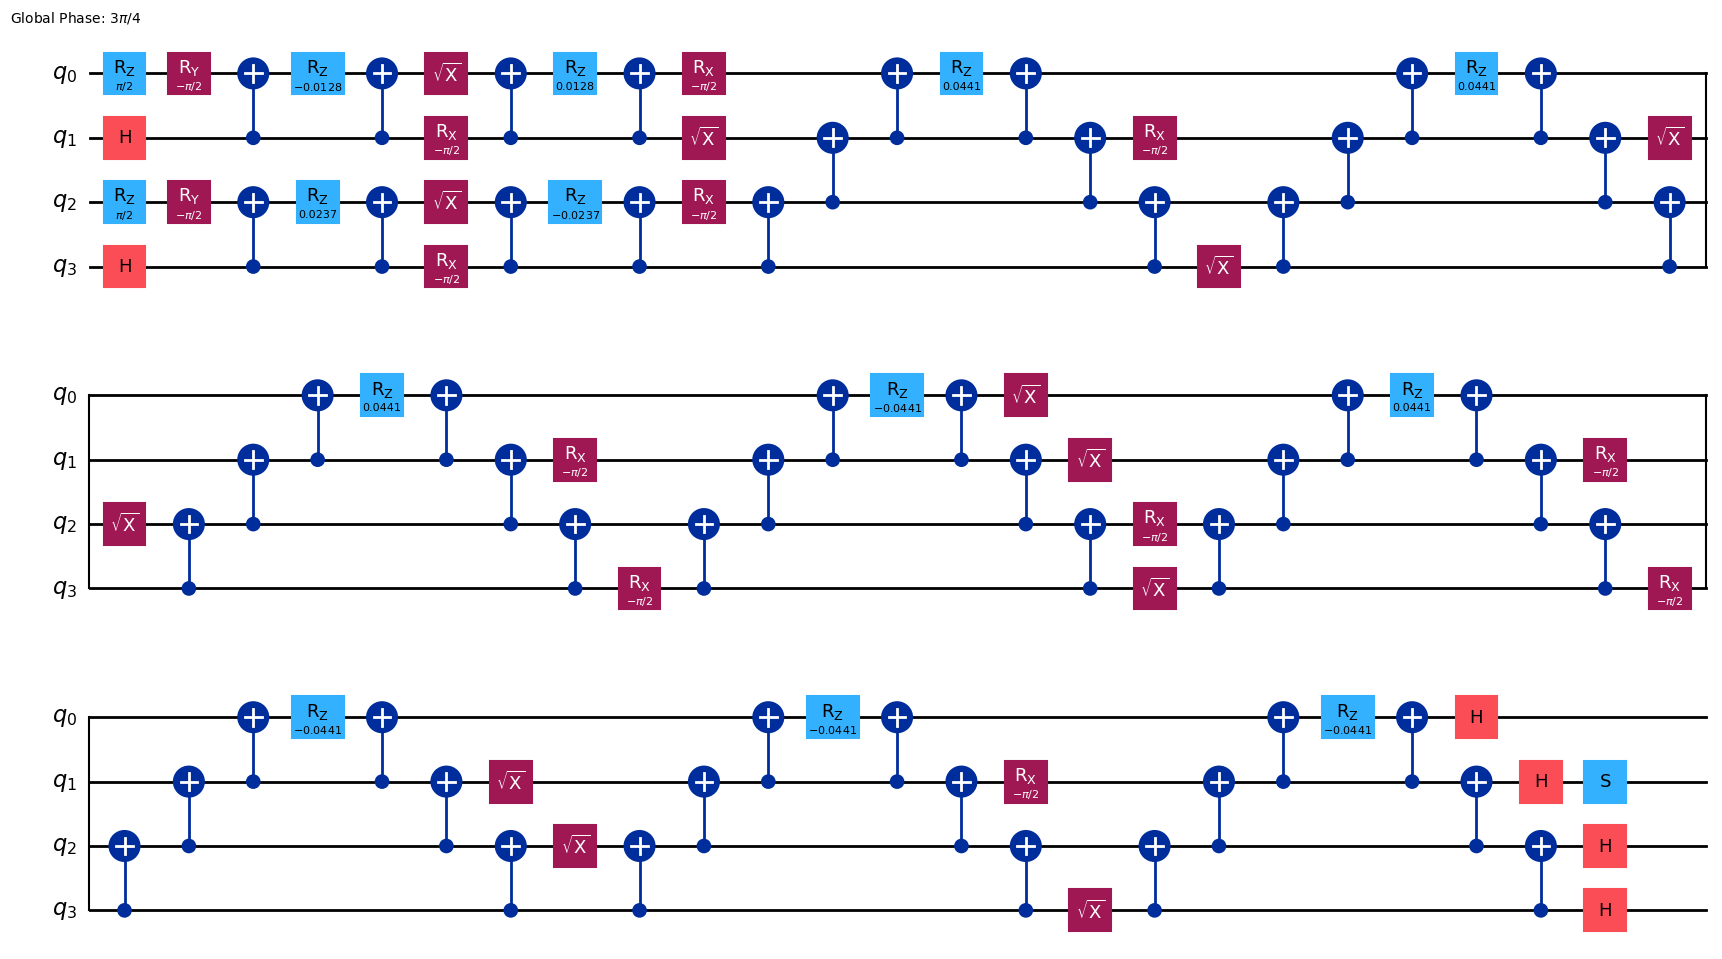

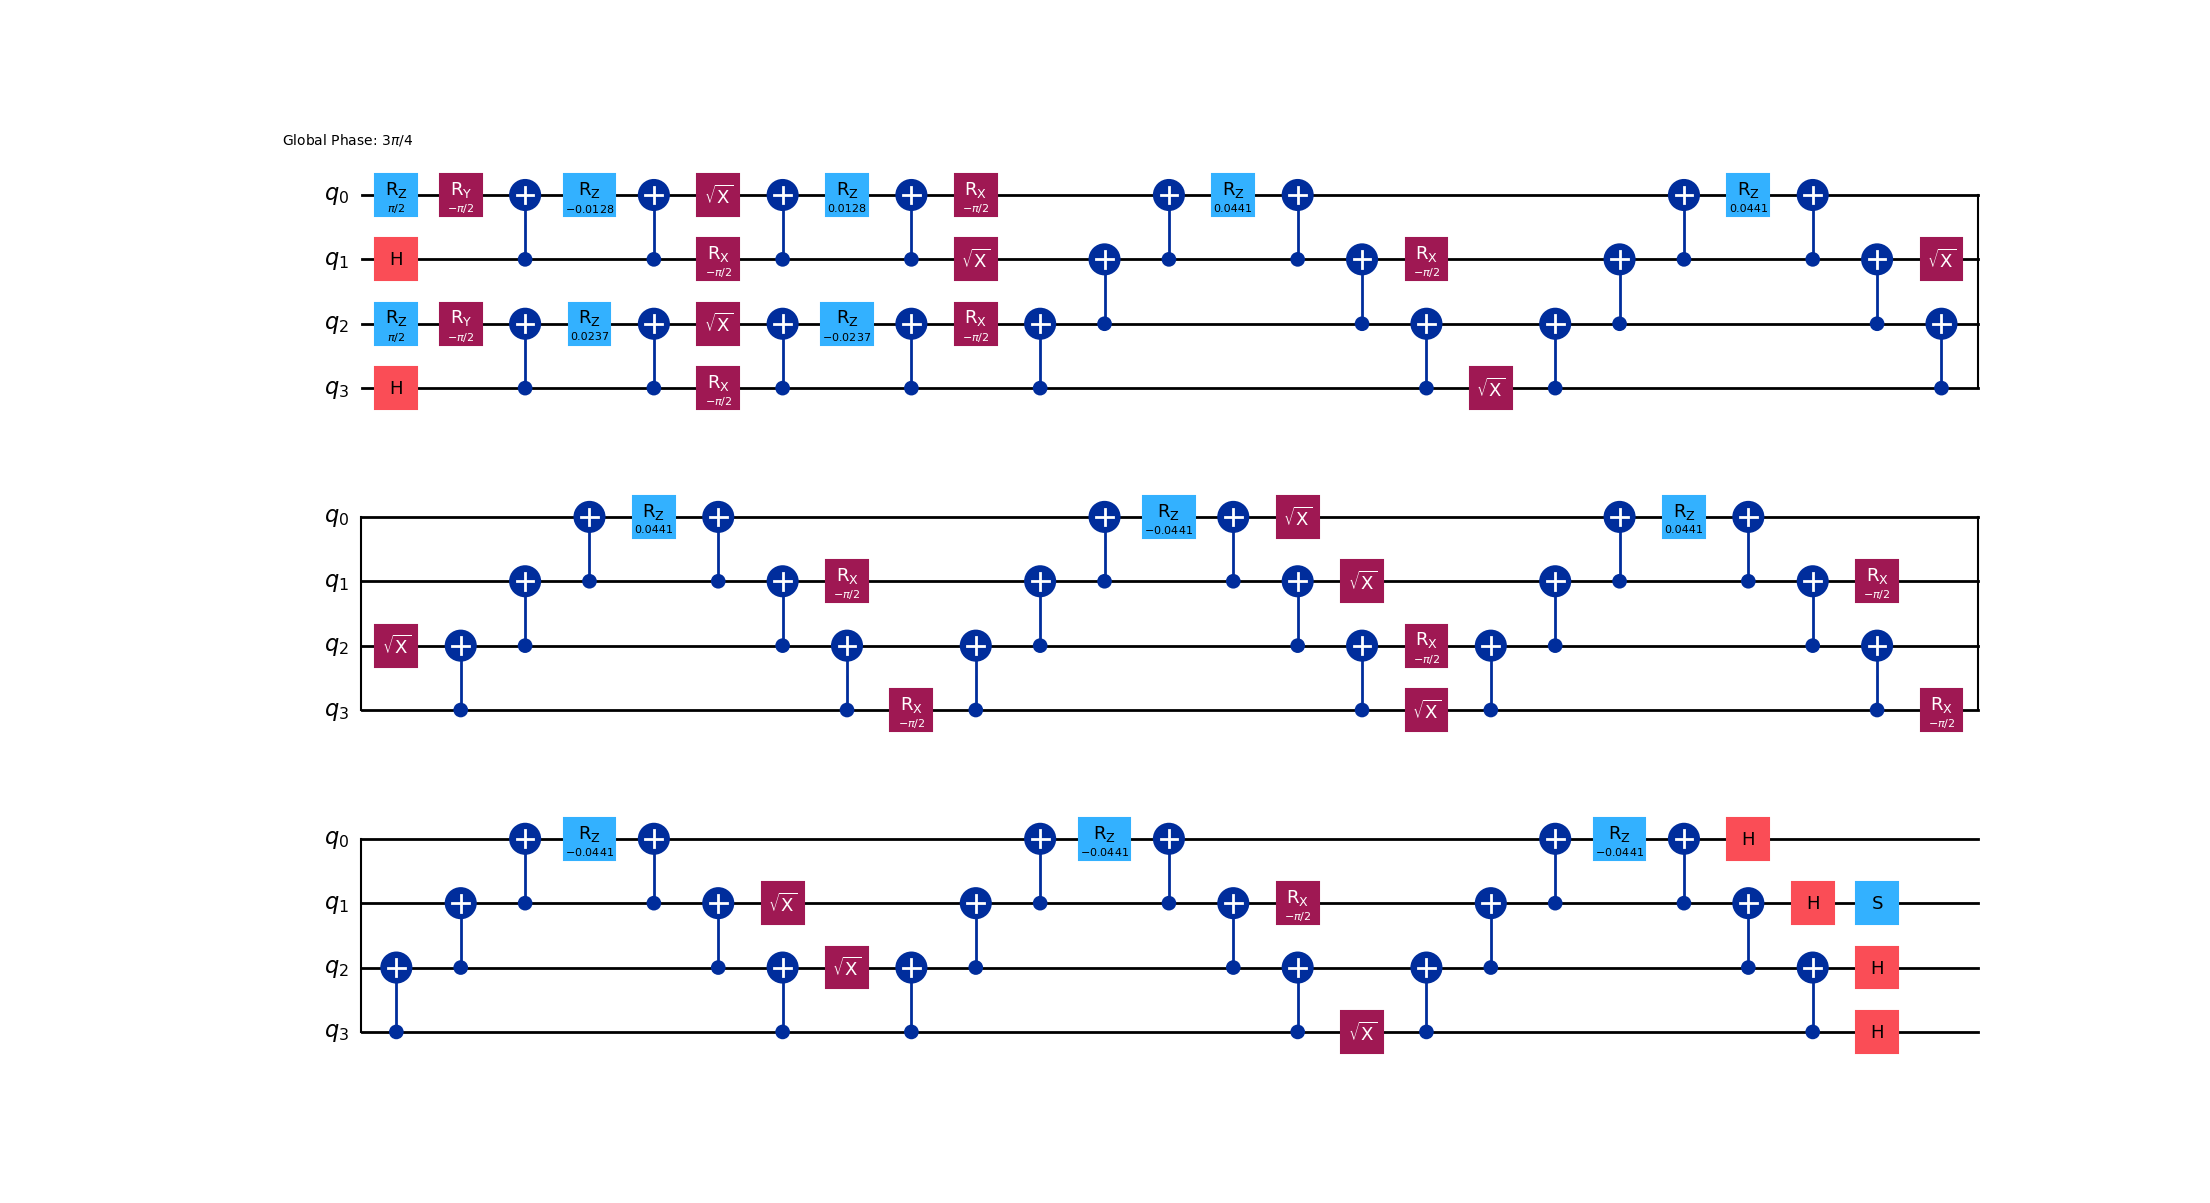

In [29]:
circuito = transpile(minimum_eigenvalue.optimal_circuit.decompose().assign_parameters(minimum_eigenvalue.optimal_parameters), sv1_simualtor)

circuito.draw(output = "mpl")  

In [30]:
gates = []

for i, (gate, qubits, etc) in enumerate(circuito.data):
    
    gates.append(gate.name)

set_gates = list(set(gates))

set_gates.sort(key = lambda x: gates.count(x), reverse = True)

print("Gates present: " + " ".join(set_gates), end = "\n\n")
print(f"Number of gates: {len(gates)}\n\nDistribution of gates: \n")

for i in set_gates:
    
    print(i, gates.count(i))

Gates present: cx rz sx rx h ry s

Number of gates: 102

Distribution of gates: 

cx 56
rz 14
sx 12
rx 11
h 6
ry 2
s 1


In [49]:
def subs_ncg(quantum_circuit, n):
    
    n = n * quantum_circuit.size() // 100

    for i, (gate, qubits, etc) in enumerate(quantum_circuit.data):
                 
        print(gate, qubits, etc)
    
    pass

In [50]:
subs_ncg(circuito, 10)

Instruction(name='rz', num_qubits=1, num_clbits=0, params=[1.5707963267948966]) [Qubit(QuantumRegister(4, 'q'), 0)] []
Instruction(name='ry', num_qubits=1, num_clbits=0, params=[-1.5707963267948966]) [Qubit(QuantumRegister(4, 'q'), 0)] []
Instruction(name='h', num_qubits=1, num_clbits=0, params=[]) [Qubit(QuantumRegister(4, 'q'), 1)] []
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]) [Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 0)] []
Instruction(name='rz', num_qubits=1, num_clbits=0, params=[-0.01284388110942944]) [Qubit(QuantumRegister(4, 'q'), 0)] []
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]) [Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 0)] []
Instruction(name='sx', num_qubits=1, num_clbits=0, params=[]) [Qubit(QuantumRegister(4, 'q'), 0)] []
Instruction(name='rx', num_qubits=1, num_clbits=0, params=[-1.5707963267948966]) [Qubit(QuantumRegister(4, 'q'), 1)] []
Instruction(name='cx', num_qubits=2, num_clbits